In [15]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [16]:
#Loading data and checking the data
df = pd.read_csv('Customer_data.csv')
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


In [17]:
#Checking the how many sets of classes are present
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [18]:
#To use scikit-learn, we have to convert the pandas data frame to a numpy array
X = df[['region', 'tenure','age','marital','address','income','ed','employ','retire','gender','reside']].values
X[0:10]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.],
       [  2.,  41.,  39.,   0.,  17.,  78.,   2.,  16.,   0.,   1.,   1.],
       [  3.,  45.,  22.,   1.,   2.,  19.,   2.,   4.,   0.,   1.,   5.],
       [  2.,  38.,  35.,   0.,   5.,  76.,   2.,  10.,   0.,   0.,   3.],
       [  3.,  45.,  59.,   1.,   7., 166.,   4.,  31.,   0.,   0.,   5.],
       [  1.,  68.,  41.,   1.,  21.,  72.,   1.,  22.,   0.,   0.,   3.]])

In [19]:
y = df['custcat'].values
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2], dtype=int64)

In [20]:
#Data Standardization is a data processing workflow that converts the structure of disparate datasets into a Common Data Format.
#Standardize features by removing the mean and scaling to unit variance
#The standard score of a sample x is calculated as:
#z = (x - u) / s | u = mean, s= standard deviation

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:2]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158]])

In [21]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [22]:
#KNN Classification
from sklearn.neighbors import KNeighborsClassifier

In [23]:
#Training the model
k = 4
neighbor= KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neighbor

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [24]:
#Predicing the test set
y_= neighbor.predict(X_test)
y_[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [25]:
#Determining the accuracy
from sklearn import metrics
print("Training set accuracy:", metrics.accuracy_score(y_train, neighbor.predict(X_train)))
print("Testing set accuracy:", metrics.accuracy_score(y_test, y_))

Training set accuracy: 0.5475
Testing set accuracy: 0.32


In [26]:
#Determining which k has better accuracy
ks=10

mean_accuracy = np.zeros((ks-1))
standard_accuracy = np.zeros((ks-1))
confusion_matrix = [];

for n in range(1,ks):
    
    #training and predicting should be done
    neighbor = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    y_=neighbor.predict(X_test)
    mean_accuracy[n-1] = metrics.accuracy_score(y_test,y_)
    standard_accuracy[n-1] = np.std(y_==y_test)/np.sqrt(y_.shape[0])
mean_accuracy   

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

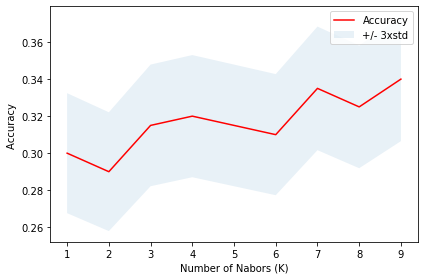

In [27]:
#Plotting the model accuracy for different neighbors
plt.plot(range(1,ks),mean_accuracy,'r')
plt.fill_between(range(1,ks),mean_accuracy-1 * standard_accuracy, mean_accuracy+1* standard_accuracy, alpha=0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [28]:
print( "The best accuracy was with", mean_accuracy.max(), "with k=", mean_accuracy.argmax()+1)

The best accuracy was with 0.34 with k= 9
